<a href="https://colab.research.google.com/github/pascal-maker/machinelearning/blob/main/Demos_GDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from ipywidgets import interact, FloatSlider


%matplotlib inline

In [12]:
def compute_J(x,y,theta0, theta1):

    x= np.c_[x,np.ones(len(x))]
    theta = np.array([theta1,theta0])
    h = np.dot(theta,x.T)
    e = h.T - y
    J = np.sum(e**2)/len(x)
    return(J)


Doel: Berekening van de kostenfunctie
𝐽
(
𝜃
0
,
𝜃
1
)
J(θ
0
​
 ,θ
1
​
 ) voor lineaire regressie.

x: Toevoegen van een bias-term (een kolom van enen) aan de invoer om de intercept (
𝜃
0
θ
0
​
 ) te kunnen modelleren.

theta: Modelparameters
𝜃
1
θ
1
​
  (helling) en
𝜃
0
θ
0
​
  (intercept) als een numpy array.

h: Voorspellingen (
ℎ
(
𝑥
)
=
𝜃
1
⋅
𝑥
+
𝜃
0
h(x)=θ
1
​
 ⋅x+θ
0
​
 ) berekend met matrixvermenigvuldiging.

e: Foutvector (verschil tussen voorspellingen en werkelijke waarden).

J: Gemiddelde kwadratische fout (Mean Squared Error) voor een bepaalde combinatie van
𝜃
0
θ
0
​
  en
𝜃
1
θ
1
​
 .

In [ ]:
data = np.genfromtxt('Blood_Pressure_GDS.csv',delimiter=',')
J = compute_J(data[:,1],data[:,2],2.85,1.67)
print(J)

9.771227272727247


Data inlezen:

Leest de dataset (Blood_Pressure_GDS.csv), waarbij de eerste kolom de index is, de tweede kolom weight en de derde kolom blood pressure.

Berekening van J:

Berekent
𝐽
J voor vaste waarden van
𝜃
0
=
2.85
θ
0
​
 =2.85 en
𝜃
1
=
1.67
θ
1
​
 =1.67.

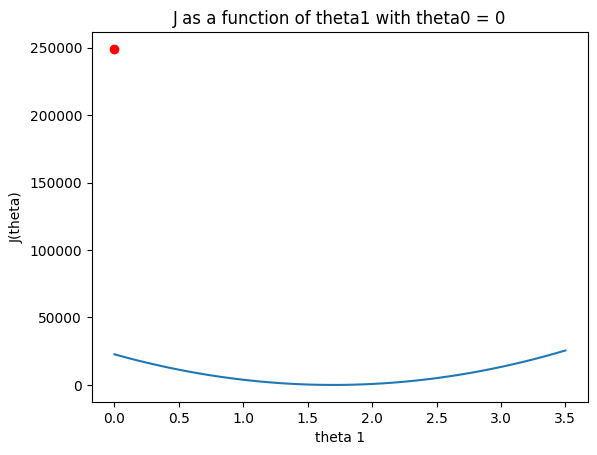

In [13]:
# Cost function J(theta1, theta0 = 0)

theta0 = 0
theta1 = np.linspace(0,3.5,100)
J = np.zeros(len(theta1))
for t in range(0,len(theta1)):
    J[t] = compute_J(data[:,1],data[:,2],theta0,theta1[t])


fig, ax = plt.subplots()

ax.plot(0, 249000,'ro')
ax.plot(theta1, J )

ax.set_xlabel('theta 1')
ax.set_ylabel('J(theta)')
ax.set_title('J as a function of theta1 with theta0 = 0');



Genereren van
𝜃
1
θ
1
​
  waarden: Van 0 tot 3.5 met 100 stappen.

Berekening van
𝐽
J voor elk
𝜃
1
θ
1
​
  met een vaste
𝜃
0
θ
0
​
 .

Visualisatie:

Plot de kostenfunctie
𝐽
J als een functie van
𝜃
1
θ
1
​
 .

Rood punt (
0
,
249000
0,249000) geeft een referentiepunt aan

In [11]:
def callCompute_J(theta0,theta1):
    Jtheta1 = compute_J(data[:,1],data[:,2],theta0,theta1)

    theta1Axis = np.linspace(0,3,40)

    xAxis = np.linspace(0,150,10)
    yAxis = xAxis * theta1 + theta0
    J = np.zeros(len(theta1Axis))
    for t in range(0,len(theta1Axis)):
        J[t] = compute_J(data[:,1],data[:,2],theta0,theta1Axis[t])


    fig_subplots = plt.figure()
    fig_subplots.set_size_inches(20,15)
    ax1 = fig_subplots.add_subplot(2,3,1)
    ax2 = fig_subplots.add_subplot(2,3,2)

    ax1.plot(theta1, Jtheta1,'ro')
    ax1.plot(theta1Axis, J )

    ax1.set_xlabel('theta1')
    ax1.set_ylabel('J')
    ax1.set_title('Cost J');

    ax2.scatter(data[:,1], data[:,2])
    ax2.plot(xAxis,yAxis,'r')
    ax2.set_xlabel('weight [kg]')
    ax2.set_ylabel('Blood pressure [mmHg]')
    ax2.set_title('Blood pressure as a funtion of the weight');

    print('J = ', Jtheta1)
    fig_subplots.tight_layout()

Dit stuk code combineert een interactieve functie met matplotlib en ipywidgets om twee verschillende grafieken te plotten die samen de invloed van de theta parameters op de cost functie
𝐽
(
𝜃
0
,
𝜃
1
)
J(θ
0
​
 ,θ
1
​
 ) en de lineaire fit van een dataset laten zien. Laten we de code stap voor stap bekijken:

1. De Functie callCompute_J
python
Copy
Edit
def callCompute_J(theta0, theta1):
Dit definieert een functie die twee parameters, theta0 en theta1, accepteert. Deze parameters vertegenwoordigen respectievelijk de bias en de helling van een lineair regressiemodel.

2. Cost Berekening voor de Huidige Waarden van theta0 en theta1
python
Copy
Edit
    Jtheta1 = compute_J(data[:,1], data[:,2], theta0, theta1)
data[:,1]: De x-waarden (bijvoorbeeld gewicht in kg).

data[:,2]: De y-waarden (bijvoorbeeld bloeddruk in mmHg).

compute_J: Een externe functie die de cost berekent voor gegeven theta0 en theta1.

3. Bereiding van de Assen voor de Plot
python
Copy
Edit
    theta1Axis = np.linspace(0, 3, 40)
    xAxis = np.linspace(0, 150, 10)
    yAxis = xAxis * theta1 + theta0
theta1Axis: Een reeks waarden voor theta1 om de cost functie over een bereik te plotten (0 tot 3, 40 punten).

xAxis: De x-waarden voor de lineaire regressie lijn (0 tot 150 kg).

yAxis: De bijbehorende y-waarden, berekend met de huidige theta0 en theta1 volgens de formule:

𝑦
=
𝜃
1
⋅
𝑥
+
𝜃
0
y=θ
1
​
 ⋅x+θ
0
​

4. Berekening van de Cost Functie over theta1
python
Copy
Edit
    J = np.zeros(len(theta1Axis))
    for t in range(0, len(theta1Axis)):
        J[t] = compute_J(data[:,1], data[:,2], theta0, theta1Axis[t])
J: Een array om de cost waarden op te slaan.

For-loop: Voor elke theta1 in theta1Axis wordt de cost berekend met de huidige theta0.

5. Initialisatie van de Figuren
python
Copy
Edit
    fig_subplots = plt.figure()
    fig_subplots.set_size_inches(20, 15)
    ax1 = fig_subplots.add_subplot(2, 3, 1)
    ax2 = fig_subplots.add_subplot(2, 3, 2)
fig_subplots: Een matplotlib figure object met een totaal van 6 (2 rijen × 3 kolommen) mogelijke subplots.

ax1 en ax2: De eerste en tweede subplot van de figure.

6. Plotten van de Cost Functie
python
Copy
Edit
    ax1.plot(theta1, Jtheta1, 'ro')
    ax1.plot(theta1Axis, J)
    ax1.set_xlabel('theta1')
    ax1.set_ylabel('J')
    ax1.set_title('Cost J');
Rode punt ('ro'): De cost voor de huidige theta0 en theta1.

Blauwe lijn: De volledige cost curve voor verschillende theta1 waarden.

Labels: Toegevoegd voor de x- en y-assen en een titel voor de grafiek.

7. Plotten van de Lineaire Regressie
python
Copy
Edit
    ax2.scatter(data[:,1], data[:,2])
    ax2.plot(xAxis, yAxis, 'r')
    ax2.set_xlabel('weight [kg]')
    ax2.set_ylabel('Blood pressure [mmHg]')
    ax2.set_title('Blood pressure as a function of the weight');
Scatter Plot: De ruwe data punten.

Rode Lijn: De lineaire regressie lijn gebaseerd op de huidige theta0 en theta1.

8. Cost Waarde Printen en Layout Instellen
python
Copy
Edit
    print('J = ', Jtheta1)
    fig_subplots.tight_layout()
Cost Printen: Laat de huidige cost waarde in de console zien.

tight_layout: Zorgt ervoor dat de subplots niet overlappen.

9. De Interactieve Slider
python
Copy
Edit
interact(callCompute_J, theta0=FloatSlider(min=-20, max=20.0, step=1, value=0), theta1=FloatSlider(min=-1, max=3, step=0.1, value=0))
interact: Maakt de functie callCompute_J interactief door sliders toe te voegen voor theta0 en theta1.

Sliders:

theta0: Verplaatsbaar van -20 tot 20 met stappen van 1.

theta1: Verplaatsbaar van -1 tot 3 met stappen van 0.1.

10. Wat Deze Code Doet
Met deze code kun je interactief zien hoe de cost functie verandert als je theta0 en theta1 aanpast. Dit helpt bij het visualiseren van de optimalisatie van lineaire regressie, waarbij je zoekt naar de waarden voor theta0 en theta1 die de cost minimaliseren.



In [ ]:
interact(callCompute_J,theta0=FloatSlider(min=-20, max=20.0, step=1, value=0),theta1=FloatSlider(min=-1, max=3, step=0.1, value=0))

interactive(children=(FloatSlider(value=0.0, description='theta0', max=20.0, min=-20.0, step=1.0), FloatSlider…

<function __main__.callCompute_J(theta0, theta1)>

Doel: Maakt een interactieve visualisatie mogelijk.

Sliders:

𝜃
0
θ
0
​
  van -20 tot 20.

𝜃
1
θ
1
​
  van -1 tot 3.

Output:

Linker plot: Kostenfunctie
𝐽
J als functie van
𝜃
1
θ
1
​
 .

Rechter plot: Lineaire regressielijn bovenop de scatterplot van de gegevens.

## 3D plots

In [ ]:
theta_0 = np.linspace(-20,30,100)
theta_1 = np.linspace(1.3,2,100)
J = np.zeros((len(theta_0),len(theta_1)))

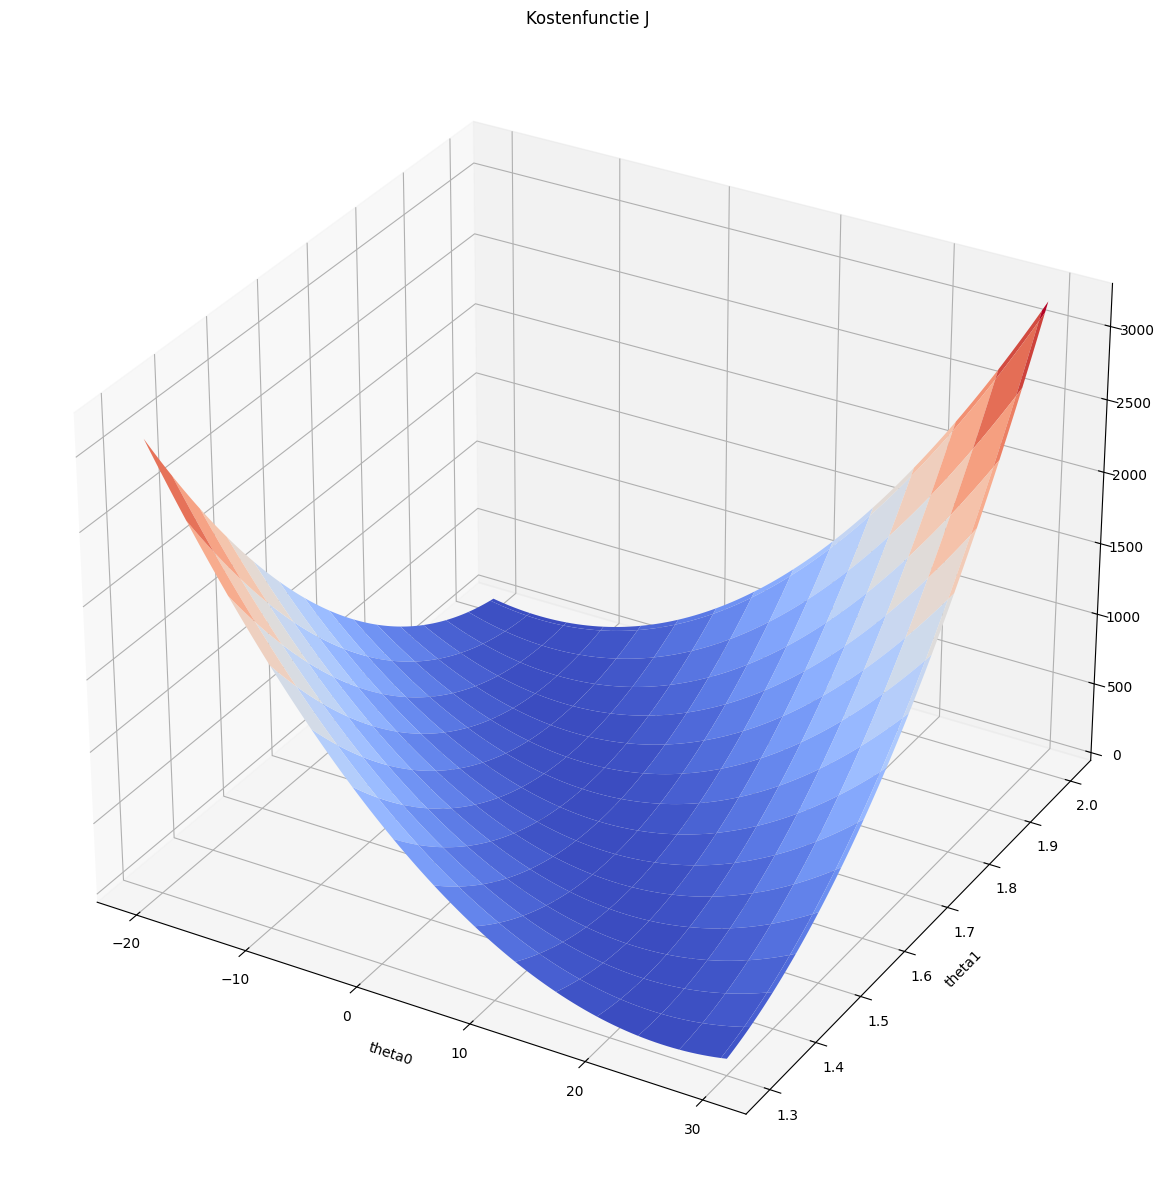

In [ ]:
for t0 in range(0,len(theta_0)):
    for t1 in range(0,len(theta_1)):
        J[t0,t1]= compute_J(data[:,1],data[:,2],theta_0[t0],theta_1[t1])

x ,y = np.meshgrid(theta_0, theta_1)

fig3D = plt.figure()
fig3D.set_size_inches(20,15)
axis3D = fig3D.add_subplot(111, projection='3d')
axis3D.plot_surface(x, y, J, rstride=7, cstride=7,cmap=cm.coolwarm)
#axis3D.scatter3D(20,1.5,35000,c='r', marker='o',s=100)
axis3D.set_xlabel('theta0')
axis3D.set_ylabel('theta1')
axis3D.set_title('Kostenfunctie J');



### **Cell 6: 3D Kostenfunctie Plot**

Deze cel maakt een 3D-plot van de kostenfunctie $J(\theta_0, \theta_1)$ voor een lineair regressiemodel, waarmee je kunt zien hoe de kosten veranderen naarmate de modelparameters variëren.

---

#### **1. Definiëren van de parameterbereiken**

```python
theta_0 = np.linspace(-20, 30, 100)
theta_1 = np.linspace(1.3, 2, 100)
```

* **theta\_0**: Genereert 100 waarden tussen -20 en 30 voor de intercept.
* **theta\_1**: Genereert 100 waarden tussen 1.3 en 2 voor de helling.

---

#### **2. Berekenen van de kostenfunctie voor elk $\theta_0, \theta_1$ paar**

```python
J = np.zeros((len(theta_0), len(theta_1)))

for t0 in range(0, len(theta_0)):
    for t1 in range(0, len(theta_1)):
        J[t0, t1] = compute_J(data[:,1], data[:,2], theta_0[t0], theta_1[t1])
```

* **Initialisatie**:

  * Creëert een 2D-array **J** van dezelfde grootte als de combinaties van **theta\_0** en **theta\_1** om de kosten op te slaan.
* **Dubbele for-lus**:

  * Berekent de kosten voor elk combinatiepaar van **theta\_0** en **theta\_1**.
  * **compute\_J** functie gebruikt de gewichten (kolom 1) en bloeddruk (kolom 2) uit de data.

---

#### **3. Creëren van een meshgrid voor 3D-plot**

```python
x, y = np.meshgrid(theta_0, theta_1)
```

* **np.meshgrid**:

  * Zet de **theta\_0** en **theta\_1** waarden om in 2D arrays die de x- en y-waarden representeren voor de 3D-oppervlakteplot.

---

#### **4. Plotten van het 3D-oppervlak**

```python
fig3D = plt.figure()
fig3D.set_size_inches(20, 15)
axis3D = fig3D.add_subplot(111, projection='3d')
axis3D.plot_surface(x, y, J, rstride=7, cstride=7, cmap=cm.coolwarm)
axis3D.set_xlabel('theta0')
axis3D.set_ylabel('theta1')
axis3D.set_title('Kostenfunctie J');
```

* **fig3D**:

  * Creëert een nieuwe figure voor de 3D-plot.
* **plot\_surface**:

  * Maakt een 3D-oppervlak met:

    * **x**: Waarden voor **theta\_0**.
    * **y**: Waarden voor **theta\_1**.
    * **J**: Kostenwaarden voor elk combinatiepaar.
  * **rstride** en **cstride** bepalen de resolutie van de gridlijnen.
  * **cmap** gebruikt het kleurenschema **coolwarm** voor duidelijk contrast.

---

#### **5. Optionele 3D-punten (uitgecommentarieerd)**

```python
# axis3D.scatter3D(20,1.5,35000,c='r', marker='o',s=100)
```

* **scatter3D** (uitgecommentarieerd) kan gebruikt worden om een specifiek punt te markeren, bijvoorbeeld een referentieoplossing of een lokaal minimum.

---

#### **6. Labels en titels**

```python
axis3D.set_xlabel('theta0')
axis3D.set_ylabel('theta1')
axis3D.set_title('Kostenfunctie J');
```

* Labels voor de x- en y-assen, en een titel voor de grafiek.

---

### **Resultaat van deze cell:**

* Het resultaat is een 3D-oppervlak dat de kostenfunctie $J(\theta_0, \theta_1)$ weergeeft.
* Dit helpt om visueel te begrijpen hoe de keuze van $\theta_0$ en $\theta_1$ de fouten beïnvloedt.
* Je kunt ook potentiële minima identificeren, waar de kosten minimaal zijn, wat het doel is van **gradient descent**.

---

Zal ik je helpen om de volgende cell met de **gradient descent** trajecten en optimalisatie uit te leggen? 😊


3D Kostenfunctie:

Visualiseert de kostenfunctie als een 3D-oppervlak.

## Gradient descent

In [ ]:
# Calculate gradients

def gradient_J(x,y,theta0,theta1):
    g0 = 0
    g1 = 0
    m = len(y)
    for gcounter in range(0,m):
        g0 = g0 + ((theta1*x[gcounter]+theta0)-y[gcounter])
        g1 = g1 + ((theta1*x[gcounter]+theta0)-y[gcounter])*x[gcounter]
    return g0,g1



Cell 7: Gradient Descent Implementatie en Visualisatie
Gradient descent is een iteratief optimalisatie-algoritme dat wordt gebruikt om de parameters (
𝜃
0
θ
0
​
  en
𝜃
1
θ
1
​
 ) te vinden die de kostenfunctie
𝐽
(
𝜃
0
,
𝜃
1
)
J(θ
0
​
 ,θ
1
​
 ) minimaliseren.

1. Functie om de gradiënten te berekenen
python
Copy
Edit
def gradient_J(x, y, theta0, theta1):
    g0 = 0
    g1 = 0
    m = len(y)
    for gcounter in range(0, m):
        g0 += (theta1 * x[gcounter] + theta0) - y[gcounter]
        g1 += ((theta1 * x[gcounter] + theta0) - y[gcounter]) * x[gcounter]
    return g0, g1
Doel: Berekening van de gradiënten van de kostenfunctie ten opzichte van
𝜃
0
θ
0
​
  en
𝜃
1
θ
1
​
 .

Uitleg:
Gradiëntberekening:

De gradiënt geeft de richting aan waarin de kosten het snelst toenemen.

We willen bewegen in de tegengestelde richting van de gradiënt om de kosten te minimaliseren.

Variabelen:

g0: Afgeleide van de kostenfunctie naar
𝜃
0
θ
0
​
 .

g1: Afgeleide van de kostenfunctie naar
𝜃
1
θ
1
​
 .

m: Aantal datapunten.

Gradiëntformules:
𝑔
0
=
1
𝑚
∑
𝑖
=
1
𝑚
[
(
𝜃
1
⋅
𝑥
𝑖
+
𝜃
0
)
−
𝑦
𝑖
]
g
0
​
 =
m
1
​
  
i=1
∑
m
​
 [(θ
1
​
 ⋅x
i
​
 +θ
0
​
 )−y
i
​
 ]
𝑔
1
=
1
𝑚
∑
𝑖
=
1
𝑚
[
(
(
𝜃
1
⋅
𝑥
𝑖
+
𝜃
0
)
−
𝑦
𝑖
)
⋅
𝑥
𝑖
]
g
1
​
 =
m
1
​
  
i=1
∑
m
​
 [((θ
1
​
 ⋅x
i
​
 +θ
0
​
 )−y
i
​
 )⋅x
i
​
 ]
2. Initialisatie van Gradient Descent
python
Copy
Edit
theta0 = 0
theta1 = 0
mu = 0.00001
iterations = 10

xt = np.zeros((iterations))
yt = np.zeros((iterations))
zt = np.zeros((iterations))
theta0 en theta1: Beginwaarden van de parameters.

mu (leerfactor): Snelheid waarmee de parameters worden bijgewerkt (ook wel learning rate genoemd).

iterations: Aantal stappen (iteraties) om te optimal

J =  22696.090909090908  theta0 =  0  theta1 =  0
J =  421.289863914063  theta0 =  0.01651  theta1 =  1.4693900000000002
J =  17.189065309697842  theta0 =  0.0187357131  theta1 =  1.6673032948
J =  9.858025309778961  theta0 =  0.019037464146102998  theta1 =  1.693960373007708
J =  9.725028334006293  theta0 =  0.019080075199412006  theta1 =  1.697550814129939
J =  9.722615462122402  theta0 =  0.019087782477797063  theta1 =  1.6980343914137774
J =  9.722571596388134  theta0 =  0.01909078853718259  theta1 =  1.6980995027168932
J =  9.722570708244431  theta0 =  0.0190931613840353  theta1 =  1.698108250501656
J =  9.722570599783717  theta0 =  0.01909544894140696  theta1 =  1.6981094066389704
J =  9.722570505467798  theta0 =  0.019097725009492614  theta1 =  1.6981095402512227


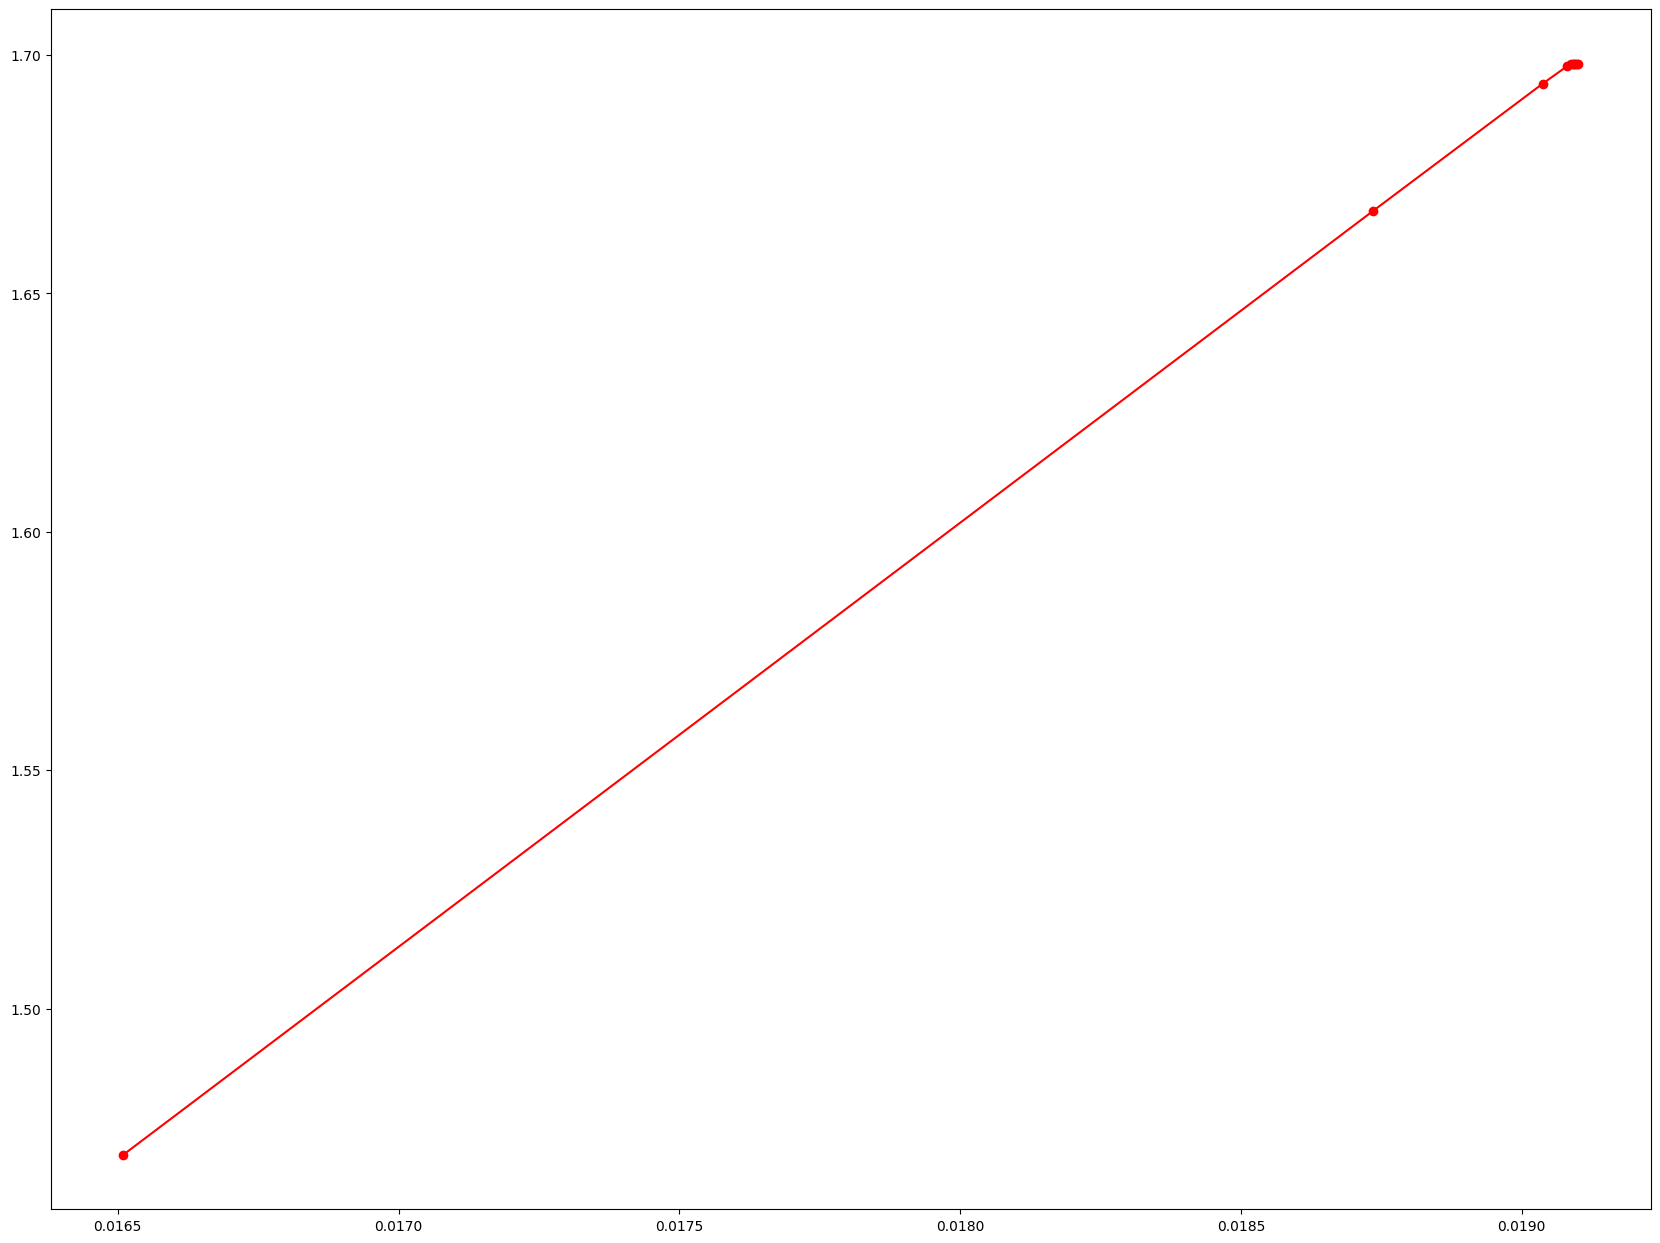

In [ ]:

fig_trajectory = plt.figure()
fig_trajectory.set_size_inches(20,15)

theta0 = 0
theta1 = 0
mu = 0.00001
iterations =10

xt = np.zeros((iterations))
yt = np.zeros((iterations))
zt = np.zeros((iterations))

for s in range(0,iterations):

    g0,g1 = gradient_J(data[:,1],data[:,2],theta0,theta1)
    J = compute_J(data[:,1],data[:,2],theta0,theta1)
    print('J = ',J,' theta0 = ',theta0,' theta1 = ',theta1)
    theta0 = theta0 - mu*g0
    theta1 = theta1 - mu*g1

    xt[s] = theta0;
    yt[s] = theta1;
    zt[s] = J

trajectory = fig_trajectory.add_axes([0.1, 0.1, 0.8, 0.8])

trajectory.plot(xt,yt,'-ro')





Deze code visualiseert de parameterupdate tijdens een **Gradient Descent** optimalisatie voor een lineaire regressieprobleem. Het volgt de verandering van de parameters $\theta_0$ (intercept) en $\theta_1$ (helling) tijdens meerdere iteraties van het algoritme. Hier is een stap-voor-stap uitleg:

### 1. Setup van de Figuur

```python
fig_trajectory = plt.figure()
fig_trajectory.set_size_inches(20,15)
```

* **`plt.figure()`**: Maakt een lege figuur aan waarin je grafieken kunt plotten.
* **`set_size_inches(20,15)`**: Stelt de afmetingen van de figuur in (20 bij 15 inch), wat vrij groot is, waarschijnlijk om details van de trajecten duidelijk te maken.

---

### 2. Initialisatie van Parameters

```python
theta0 = 0
theta1 = 0
mu = 0.00001
iterations = 10
```

* **`theta0` en `theta1`**: Beginwaarden voor de intercept en helling van de lineaire regressie.
* **`mu`**: De learning rate, bepaalt hoe groot de stappen in de richting van de negatieve gradiënt zijn.
* **`iterations`**: Het aantal iteraties van de gradient descent.

---

### 3. Arrays voor Traject Opname

```python
xt = np.zeros((iterations))
yt = np.zeros((iterations))
zt = np.zeros((iterations))
```

* **`xt`, `yt`, `zt`**: Lege arrays om de waardes van $\theta_0$, $\theta_1$ en de kostenfunctie $J$ tijdens elke iteratie op te slaan.

---

### 4. Gradient Descent Loop

```python
for s in range(0,iterations):
    g0, g1 = gradient_J(data[:,1],data[:,2],theta0,theta1)
    J = compute_J(data[:,1],data[:,2],theta0,theta1)
    print('J = ',J,' theta0 = ',theta0,' theta1 = ',theta1)
    theta0 = theta0 - mu*g0
    theta1 = theta1 - mu*g1

    xt[s] = theta0
    yt[s] = theta1
    zt[s] = J
```

* **`gradient_J`**: Berekent de partiële afgeleiden van de kostenfunctie $J$ met betrekking tot $\theta_0$ en $\theta_1$. Dit geeft de richting van de steilste stijging.
* **`compute_J`**: Berekent de waarde van de kostenfunctie $J$ voor de huidige parameters.
* **Parameterupdate**:

  * **`theta0 = theta0 - mu * g0`**: Update voor $\theta_0$.
  * **`theta1 = theta1 - mu * g1`**: Update voor $\theta_1$.
* **Data Opslaan**:

  * **`xt[s]`**: Slaat de nieuwe waarde van $\theta_0$ op.
  * **`yt[s]`**: Slaat de nieuwe waarde van $\theta_1$ op.
  * **`zt[s]`**: Slaat de huidige kostenfunctie $J$ op.

---

### 5. Visualisatie van het Traject

```python
trajectory = fig_trajectory.add_axes([0.1, 0.1, 0.8, 0.8])
trajectory.plot(xt,yt,'-ro')
```

* **`add_axes`**: Voegt een assenstelsel toe aan de figuur.
* **`plot(xt, yt, '-ro')`**:

  * Plot de trajecten van $\theta_0$ tegen $\theta_1$ als rode lijnen met cirkelvormige markeringen ('ro').
  * Dit laat zien hoe de parameters zich aanpassen tijdens de gradient descent.

---

### Wat Gebeurt Hier Eigenlijk?

Het doel van deze code is om de **parametertrajecten** van een lineaire regressiemodel tijdens gradient descent te visualiseren. Dit helpt om te zien hoe de parameters stap voor stap dichter bij het optimale punt bewegen waar de kostenfunctie minimaal is.

**Opmerkingen en mogelijke verbeteringen:**

* Het aantal iteraties (10) is erg laag, wat betekent dat de beweging waarschijnlijk traag en onvolledig zal zijn.
* De learning rate ($0.00001$) is vrij klein, wat de convergentie vertraagt.
* Een 3D-plot zou hier nuttig kunnen zijn om ook $J$ te visualiseren (bijvoorbeeld een contour- of oppervlakdiagram).

Zal ik je laten zien hoe je deze code kunt aanpassen voor een betere visualisatie met meer inzicht? 😊
